In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
# Model
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df = df.drop(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis = 1)
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [5]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


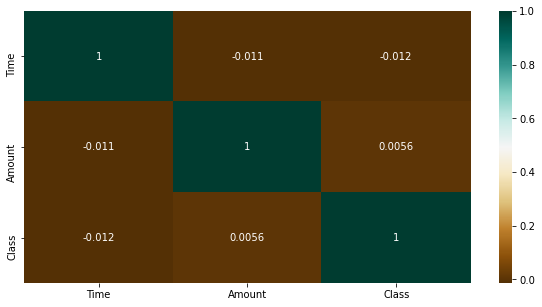

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:,2:3].values

In [8]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 99.72496284072423 %


In [12]:
l1=[]
for i in range (len(y_pred)):
    if(y_pred[i]==1):
        l1.append(i)
print(l1)



[51, 559, 868, 1163, 2120, 2277, 2669, 3777, 4675, 4940, 5100, 5129, 5173, 5925, 8998, 10934, 11066, 12121, 13690, 14279, 14796, 15048, 15935, 16592, 17148, 17175, 17664, 18130, 19033, 19315, 19470, 20031, 21074, 22280, 22718, 23507, 24105, 24481, 26055, 26667, 27323, 27418, 27874, 28328, 28487, 29437, 29719, 30850, 31055, 32572, 32827, 32949, 33102, 33157, 33215, 33948, 34452, 34596, 35682, 35829, 35931, 36676, 36786, 36831, 38016, 38494, 39123, 41022, 41451, 42149, 42229, 42912, 42995, 43475, 44395, 45397, 45438, 48324, 48631, 49170, 49246, 49807, 50282, 50308, 50540, 50820, 51035, 51622, 52287, 52941, 53371, 53920, 54011, 54139, 54743, 55409, 55714, 55817, 56116, 56527, 57636, 58395, 58587, 59241, 59580, 60205, 60633, 61138, 62375, 62425, 62497, 62783, 63667, 63726, 66799, 66851, 70158, 70416, 70629, 70846, 71012, 71243, 71420, 72308, 72421, 72586, 72670, 73235, 74880, 75805, 76949, 77913, 78904, 78979, 79180, 79450, 79479, 79577, 81272, 81311, 83732, 83971, 84376, 84458, 85405]


In [13]:
print(x_test[51])

[5.6803e+04 1.0000e+00]


In [14]:
import pickle
pickle.dump(clf,open('Class.pkl','wb'))

In [15]:
y_pred1 = clf.predict([[56803 ,1]])
print(y_pred1)

[1]


In [17]:
# XGBOOST
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\hp\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.84%
